In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_excel('Air_BNB.xlsx')

In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [4]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [5]:
df.shape

(74111, 11)

In [6]:
df.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  float64
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.2+ MB


In [8]:
df.describe()

,id,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,74107.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,0.734060,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,0.441835,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,0.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,1.000000,100.000000,10.000000,18.000000,7.600402


In [9]:
df_2 = df.drop("id", axis=1)

In [10]:
df_2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [11]:
def find_num_count(df_2):
    for col in df_2.columns:
        if df_2[col].dtype == object:
            print("number of unique categories", df_2[col].nunique())
            print("null values in ",col, ":", df_2[col].isnull().sum())
            print()
        else:
            print("null values in ",col, ":", df_2[col].isnull().sum())
            print()

In [12]:
find_num_count(df_2)

number of unique categories 3
null values in  room_type : 5

null values in  accommodates : 3

null values in  bathrooms : 203

number of unique categories 3
null values in  cancellation_policy : 8

null values in  cleaning_fee : 4

number of unique categories 2
null values in  instant_bookable : 0

null values in  review_scores_rating : 16722

null values in  bedrooms : 92

null values in  beds : 131

null values in  log_price : 0



In [13]:
df_2.drop_duplicates(inplace=True)

In [14]:
df_2.shape

(54117, 10)

In [15]:
df_2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [16]:
find_num_count(df_2)

number of unique categories 3
null values in  room_type : 5

null values in  accommodates : 3

null values in  bathrooms : 195

number of unique categories 3
null values in  cancellation_policy : 8

null values in  cleaning_fee : 4

number of unique categories 2
null values in  instant_bookable : 0

null values in  review_scores_rating : 10215

null values in  bedrooms : 92

null values in  beds : 125

null values in  log_price : 0



In [17]:
df_2 = pd.get_dummies(df_2, columns=['room_type', 'cancellation_policy', "instant_bookable"], drop_first=True)

In [18]:
df_2.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True


In [19]:
df_2.reset_index(drop=True, inplace=True)

In [20]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,False
54113,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,False,False,True,False,False
54114,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True
54115,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,False,False,False,True,True


In [21]:
def fillValue(wty, df_2):
    for col in df_2.columns:
        if wty == "mean":
            value = df_2[col].mean()
        if wty == "median":
            value = df_2[col].median()
        if df_2[col].dtype != "object":
            df_2[col] = df_2[col].fillna(value)

    print(df_2.isnull().sum())
    return df_2

In [22]:
df_med = fillValue("median", df_2.copy())

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64


In [23]:
df_mean = fillValue("mean", df_2.copy())

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64


In [24]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [25]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_im = df_2.copy()
df_imputed = imputer.fit_transform(df_im)
df_im = pd.DataFrame(data = df_imputed, columns=df_im.columns)

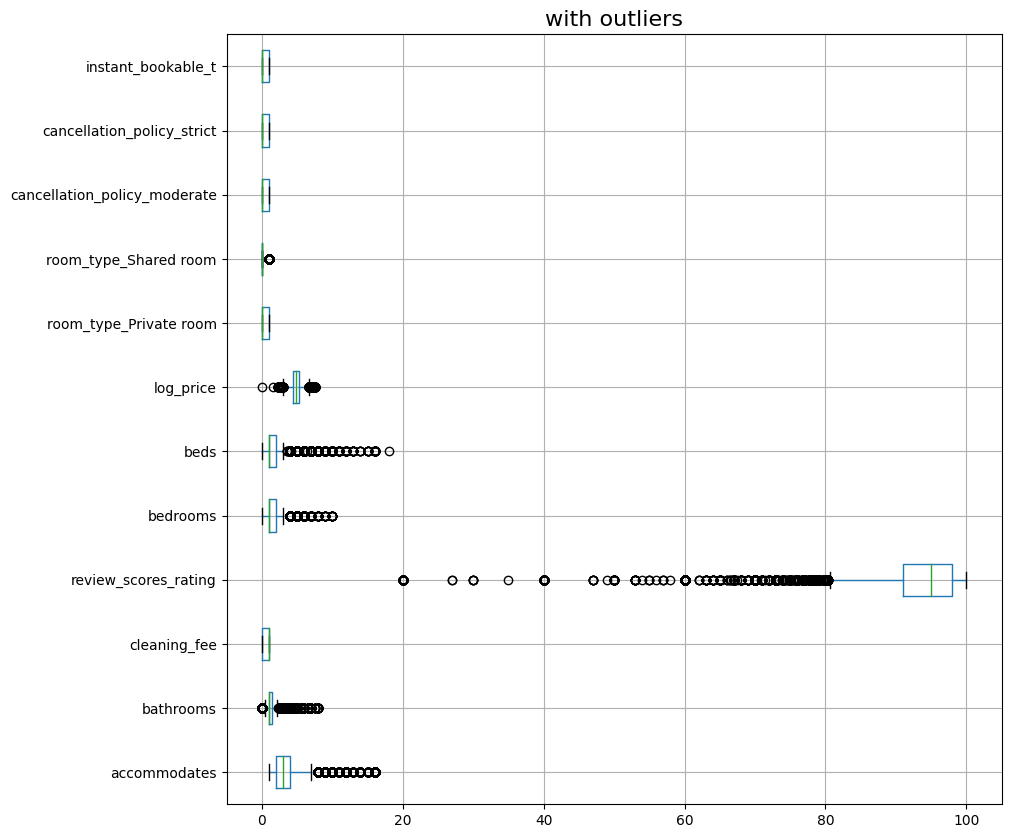

In [27]:
cont = df_im.dtypes[(df_im.dtypes!="uint8") & (df_im.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_im[cont].boxplot(vert=0)
plt.title('with outliers', fontsize=16)
plt.show()

In [36]:
def get_lr_ur(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [44]:
get_lr_ur(df_mean_out["review_scores_rating"])

(83.0, 107.0)

In [51]:
def remove_outliers(df, col):
    lr, ur = get_lr_ur(df[col])
    print(lr, ur)
    df[col] = np.where(df[col]>ur, ur, df[col]) #if condition is met replace with ur and if not keep it as is
    df[col] = np.where(df[col]<lr, lr, df[col])
    cont = df.dtypes[(df.dtypes!="uint8") & (df.dtypes!='bool')].index
    plt.figure(figsize=(10,10))
    df[cont].boxplot(vert=0)
    plt.title('with outliers', fontsize=16)
    plt.show()
    return df

In [52]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_im_out = df_im.copy()

83.0 107.0


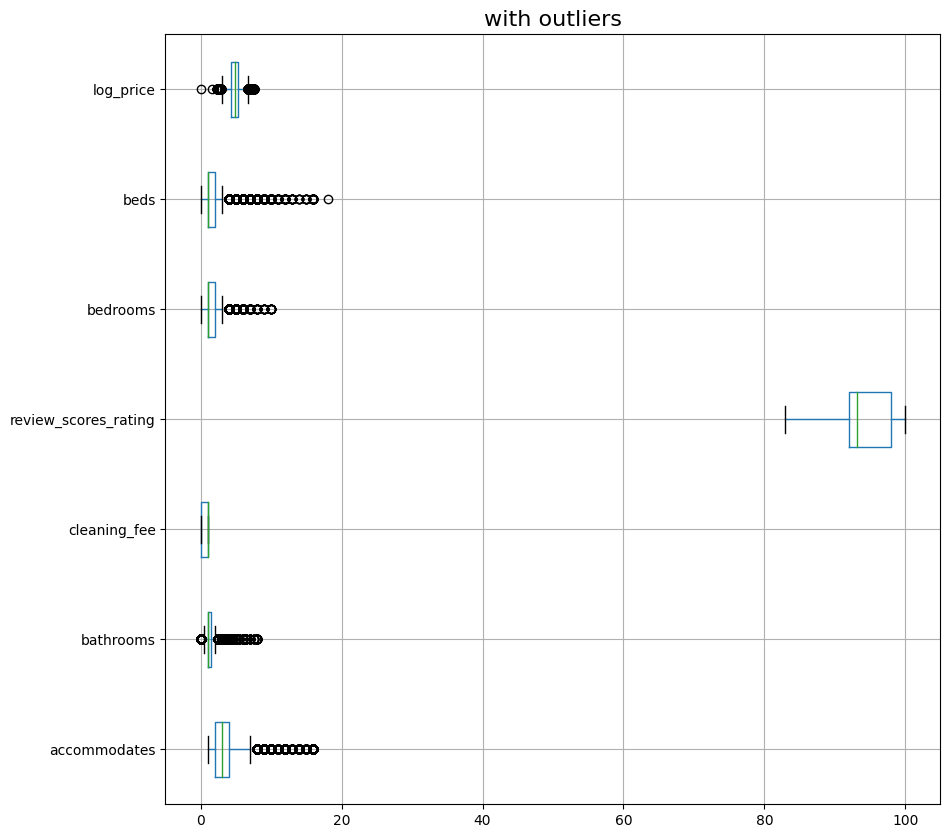

In [53]:
df_mean_out = remove_outliers(df_mean_out, "review_scores_rating")

83.0 107.0


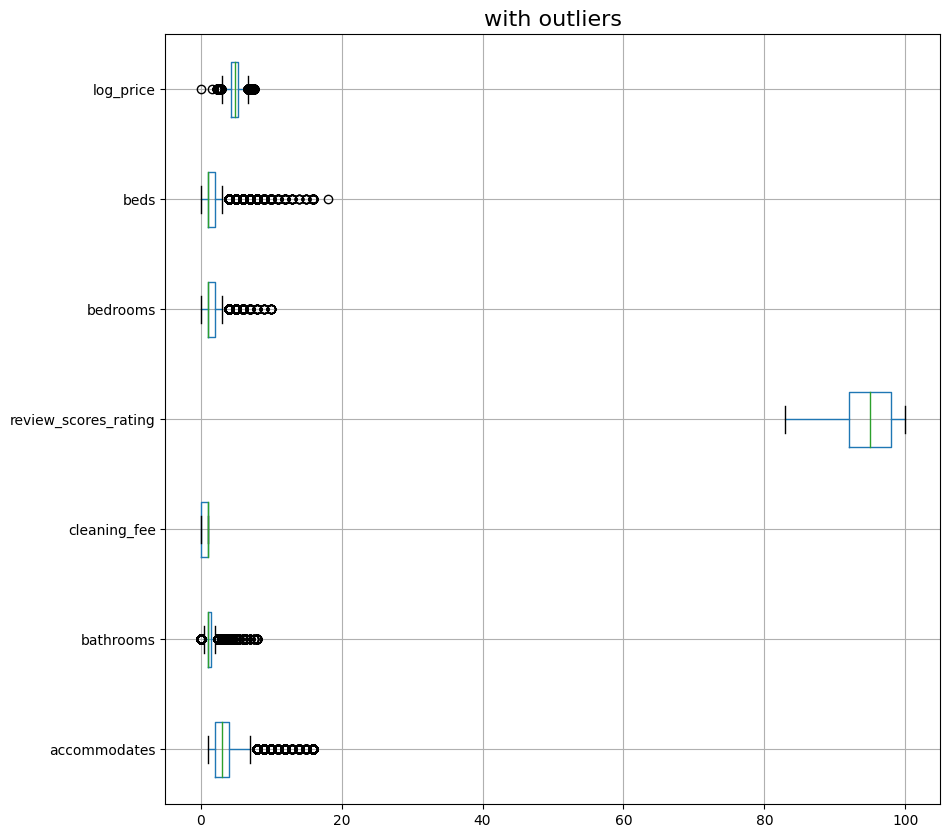

In [54]:
df_med_out = remove_outliers(df_med_out, "review_scores_rating")

80.5 108.5


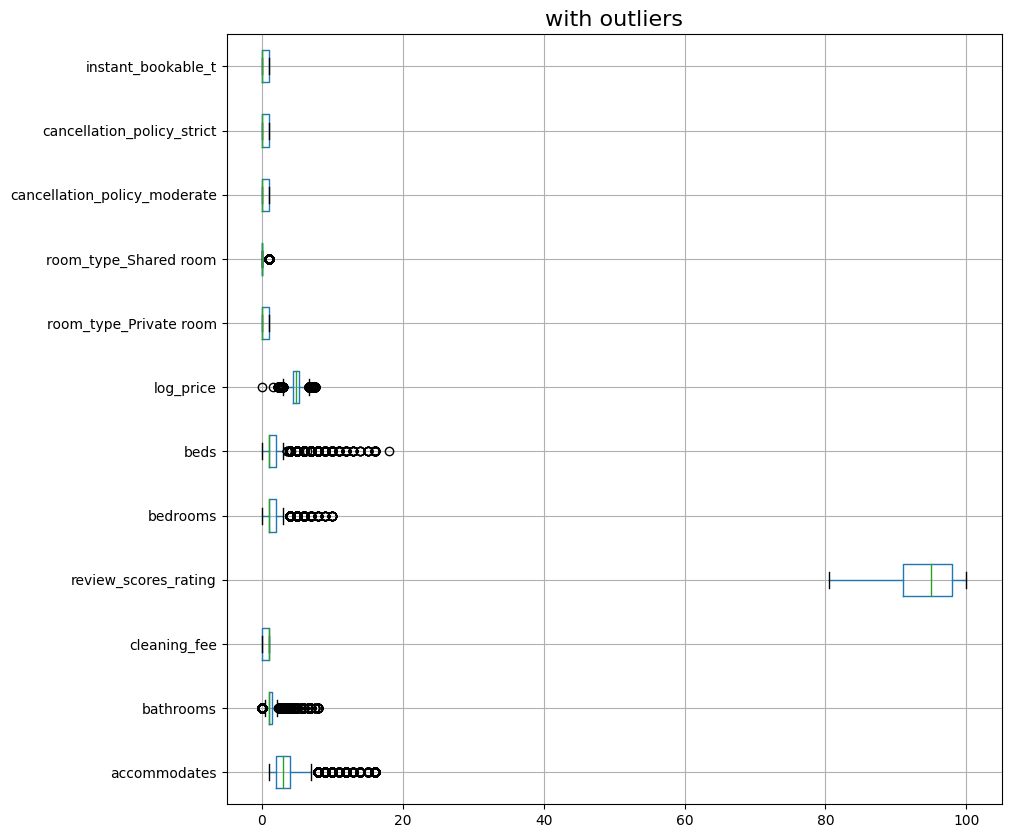

In [55]:
df_im_out = remove_outliers(df_im_out, "review_scores_rating")

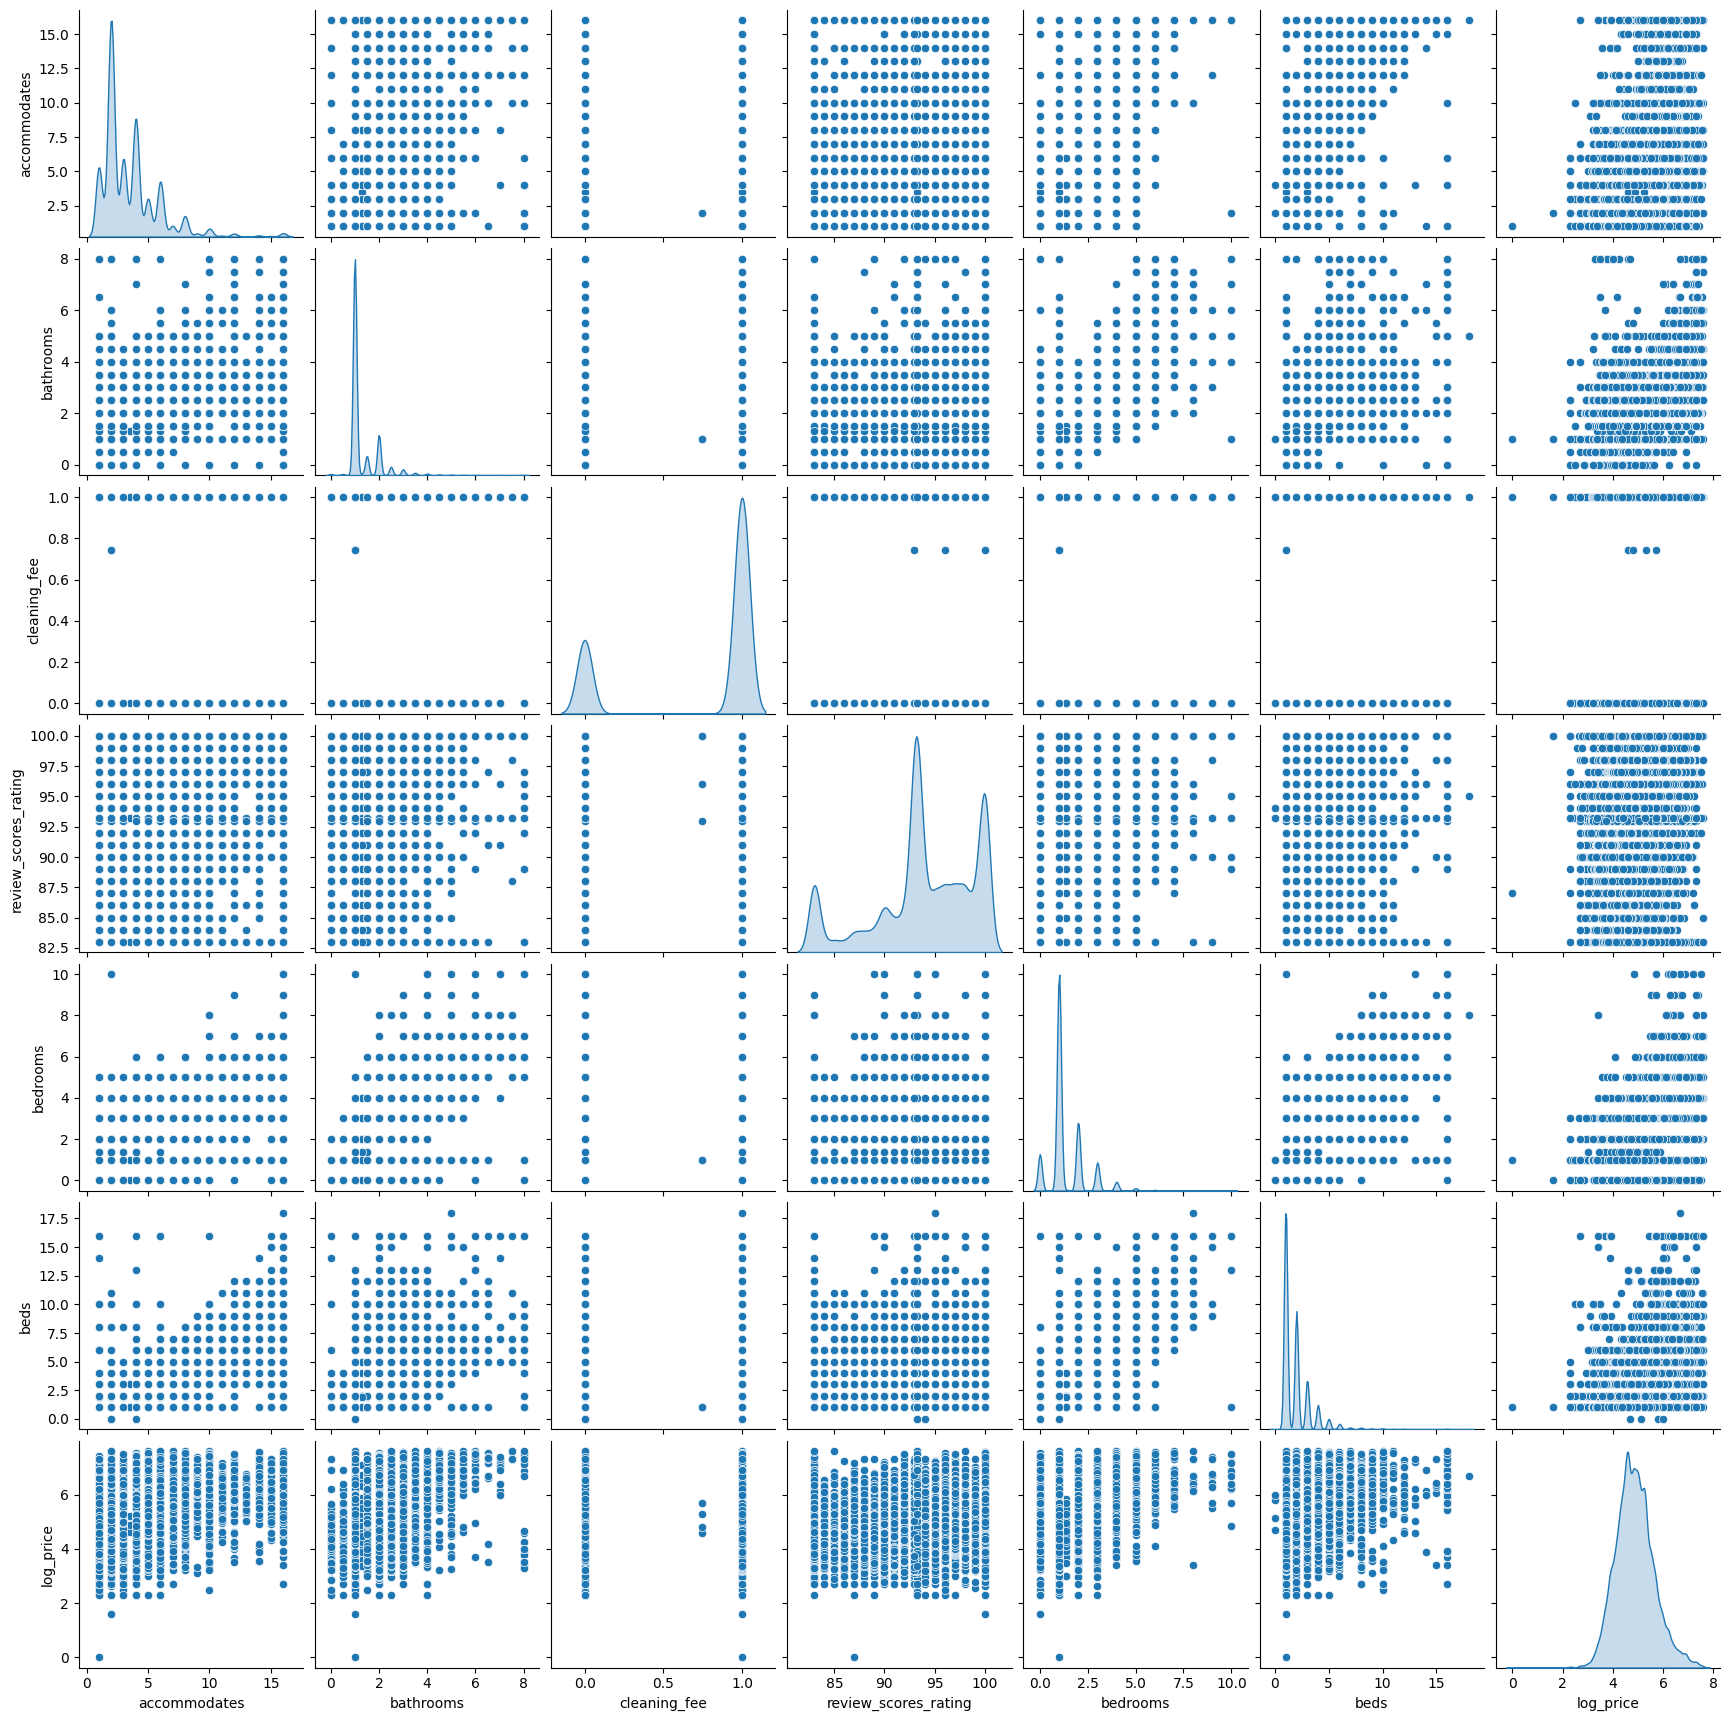

In [56]:
cont = df_mean_out.dtypes[(df_mean_out.dtypes!="uint8") & (df_mean_out.dtypes!='bool')].index
df_attr = (df_mean_out[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

In [61]:
def heatmap_def(df):
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(), annot=True)
    plt.show()

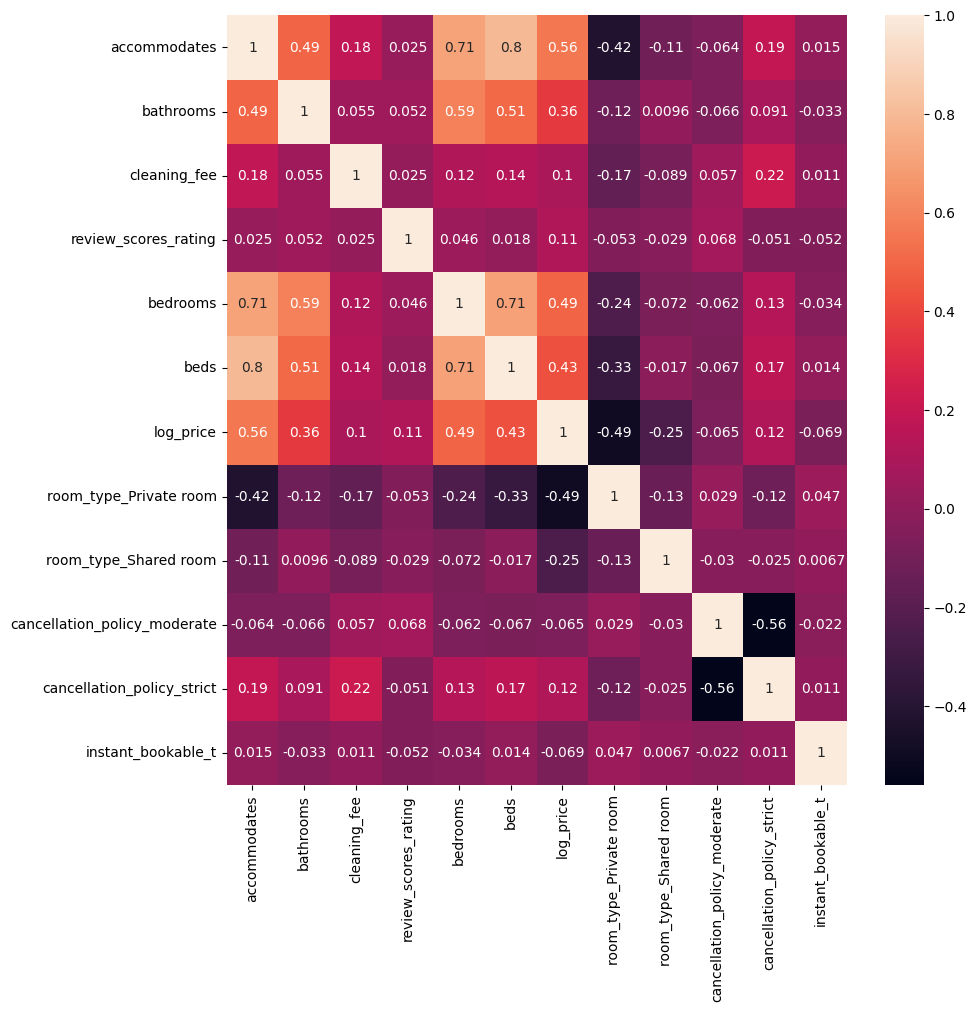

In [62]:
heatmap_def(df_mean_out)

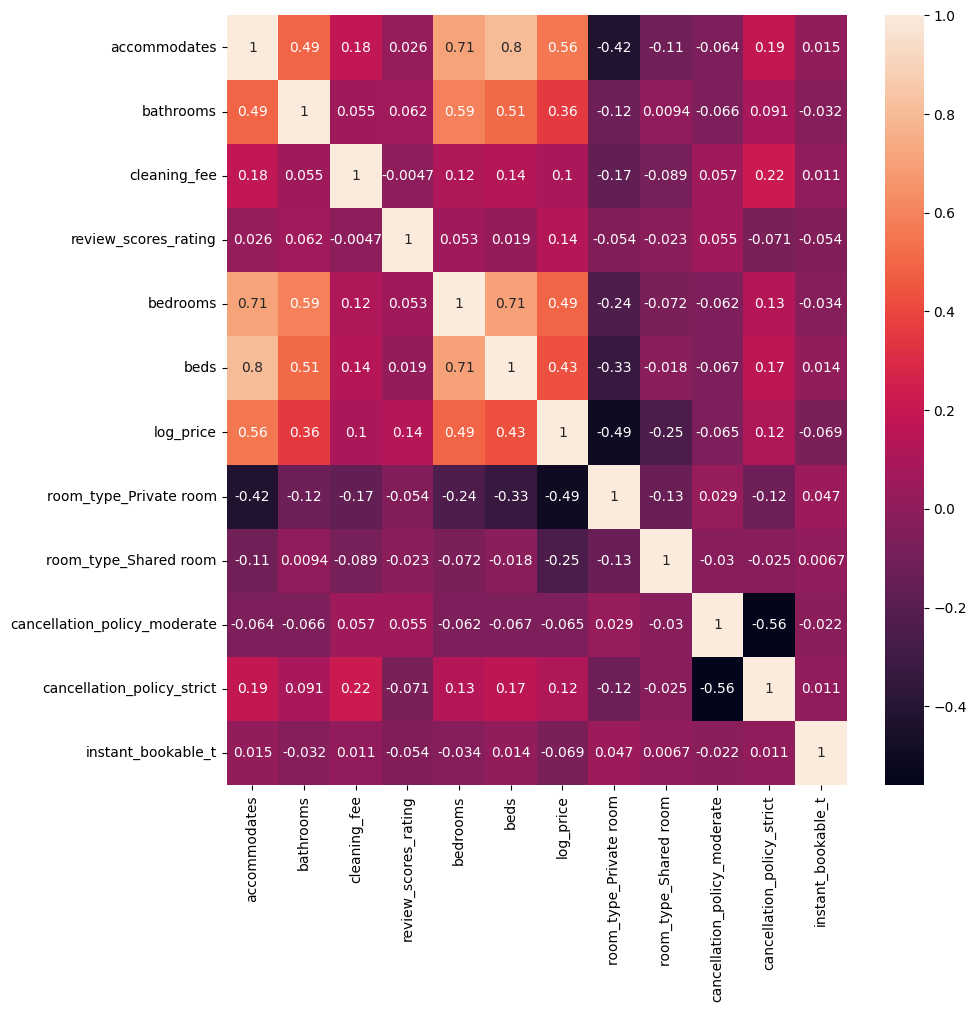

In [63]:
heatmap_def(df_med_out)

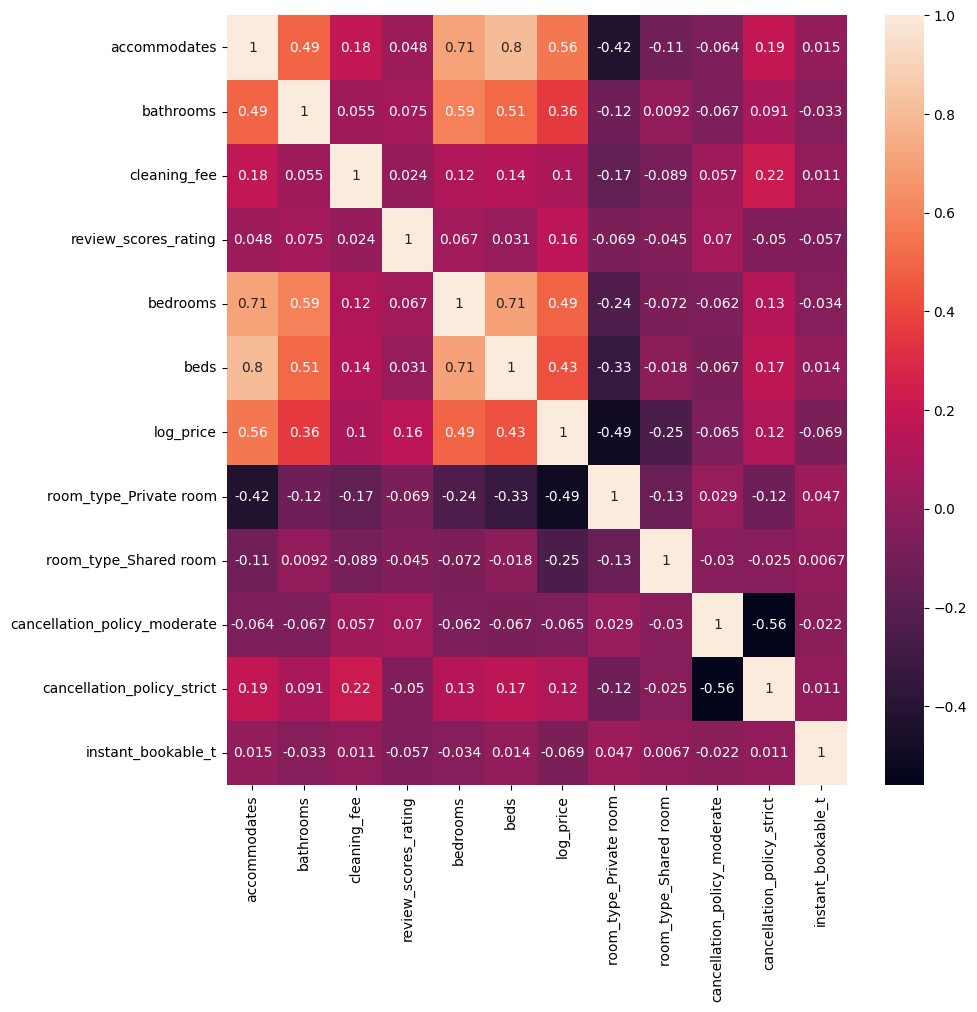

In [64]:
heatmap_def(df_im_out)

In [77]:
def get_score(df):
    X = df.drop('log_price', axis=1)
    y = df[['log_price']]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    print("model score is :", regression_model.score(X_train, y_train))
    for idx, col_name in enumerate(X_train.columns):
        print("the Coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    print("the intercept for our model is {}".format(regression_model.intercept_[0]))

In [73]:
get_score(df_mean_out)

model score is : 0.5035906945785223


In [74]:
get_score(df_med_out)

model score is : 0.5062611954743282


In [78]:
get_score(df_im_out)

model score is : 0.5076514297301177
the Coefficient for accommodates is 0.07504474784053047
the Coefficient for bathrooms is 0.14565583880618818
the Coefficient for cleaning_fee is -0.08398559857391513
the Coefficient for review_scores_rating is 0.012522233943025464
the Coefficient for bedrooms is 0.1524588341385401
the Coefficient for beds is -0.04743400591218794
the Coefficient for room_type_Private room is -0.6362450290126316
the Coefficient for room_type_Shared room is -1.1126397799381498
the Coefficient for cancellation_policy_moderate is -0.07261016804591192
the Coefficient for cancellation_policy_strict is -0.01253744068942416
the Coefficient for instant_bookable_t is -0.05583439694629095
the intercept for our model is 3.4787048940587972
